In [0]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from sklearn import neighbors, datasets
from sklearn.model_selection import cross_val_score, train_test_split


% matplotlib inline

# Iris Flower Dataset
The data set consists of samples from each of three species of Iris as: 
- Iris setosa
- Iris virginica
- Iris versicolor

These flowers are separated/seggregated by various attributes like:
- sepal length
- sepal width
- petal length
- petal width

These attributes are the actual features used for classification purpose.

Iris Setosa
<img src="https://upload.wikimedia.org/wikipedia/commons/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg" alt="Flower Labels" style="width: 100px;"/> 


Iris Versicolor
<img src="https://upload.wikimedia.org/wikipedia/commons/4/41/Iris_versicolor_3.jpg" alt="Flower Labels" style="width: 100px;"/>

Iris Virginica
<img src="https://upload.wikimedia.org/wikipedia/commons/9/9f/Iris_virginica.jpg alt="Flower Labels" style="width: 100px;"/>

In [12]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target
#print(X)
#print(Y)
flowers = iris.target_names
print(flowers)
features = iris.feature_names
print(features)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


# Plot and Feature Visualization
Since there are 4 features for a single data point, we cannot visualize such 4d point directly (out of perception for a creature like us). For now we can visualize 2 features at a time.

Text(0.5,1,'Iris data 2D')

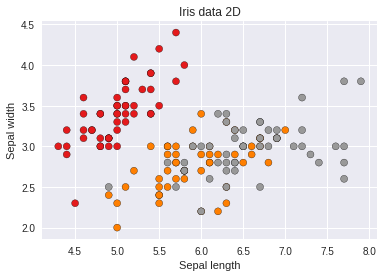

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Iris data 2D')

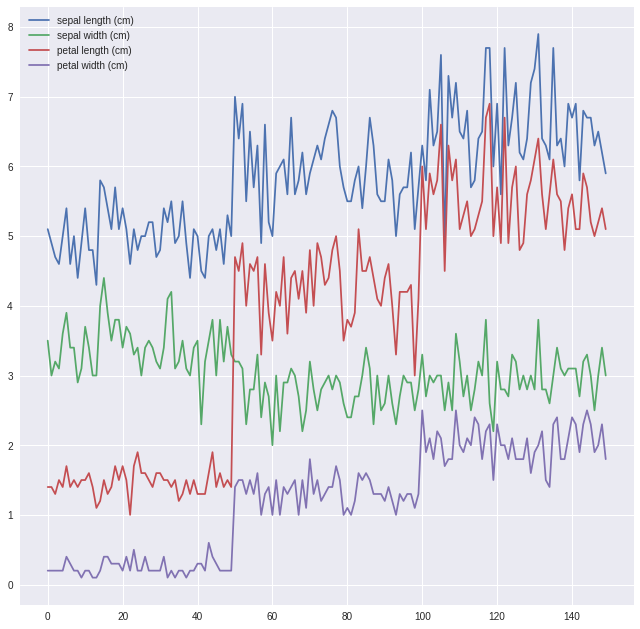

In [16]:
df = pd.DataFrame(X, columns=features)
df.plot(figsize=(11, 11))

# K Nearest Neighbors (KNN) 
It is a simple classifier that tries to assign label to current data point based on its neighbors.

In k-NN classification, the output is a class membership. An object is classified by a majority vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

In [0]:
# use knn on whole dataset
model = neighbors.KNeighborsClassifier(n_neighbors=5)
model.fit(X, Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [0]:
y_predicted = model.predict([[3, 5, 4, 2]])
print("Predicted Y :: {}".format(y_predicted))
print("Target flower :: {}".format(iris.target_names[y_predicted]))
print("Probability for each flower :: {}".format(model.predict_proba([[3, 5, 4, 2]])))

Predicted Y :: [1]
Target flower :: ['versicolor']
Probability for each flower :: [[0.  0.8 0.2]]


# Hold Out Method
In this method, the original traiing dataset is splitted into 2 parts:
- train : to fit the model
- test : to evaluate the model


This is almost good since we have fitted our model to only train set and we can see how the model performs for test set
which we haven't used for train.

In [0]:
# split whole data -> hold-out

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3)

# use knn on train dataset
model = neighbors.KNeighborsClassifier(n_neighbors=3)

model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

acc = np.sum(Y_pred == Y_test) /  len(Y_test)
acc * 100

100.0

# k-fold cross validation

This is holdout method on steroids. Here we do holdout method for k times and do some kind of averaging (or similar stuff) to evaluate the overall performance.

The optimal number of neighbors is 13


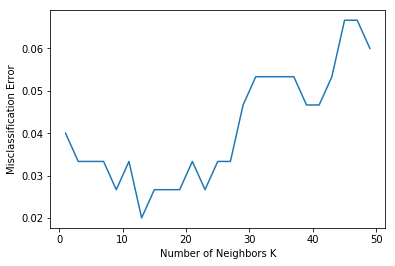

In [0]:
# cross validation -> using holdout method for k times

# creating odd list of K for KNN
klist = list(range(1,50, 2))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation for each k value
for k in klist:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
errors = 1- np.array(cv_scores)

# determining best k
optimal_k = klist[np.argmin(errors)]
print("The optimal number of neighbors is {}".format(optimal_k))

# plot misclassification error vs k
plt.plot(klist, errors)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()